In [1]:
#1.读取数据 
import numpy as np # 导入 NumPy库
import pandas as pd # 导入 Pandas库
df = pd.read_csv("G:/儿童骨密度/DATA/Raw data/p_TP1NP_2.csv")  # 读取文件
df.head() # 显示前 5行数据

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,0
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,0


In [2]:
df.target.value_counts() # 输出分类值 , 及各个类别数目

0    166
1    166
Name: target, dtype: int64

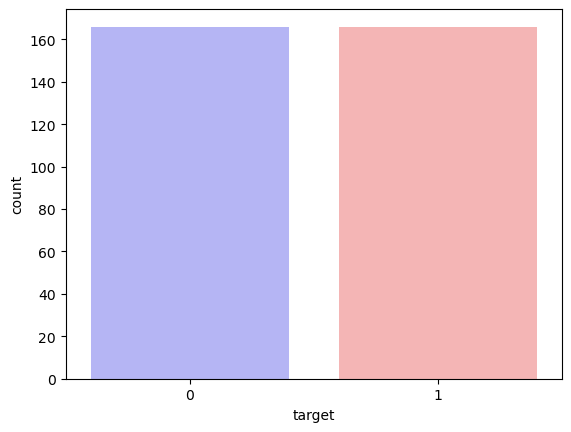

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [4]:
#df = df.drop(columns = ['ID'])#去除ID列
df.head()

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,0
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,0


In [5]:
#2.构建特征集和标签集
X = df.drop(['target'], axis = 1) # 构建特征集
y = df.target.values # 构建标签集
y = y.reshape(-1, 1) # -1是相对索引 , 等价于 len(y)
print("张量 X的形状 :", X.shape)
print("张量 y的形状 :", y.shape)

张量 X的形状 : (332, 22)
张量 y的形状 : (332, 1)


In [6]:
#3.拆分数据集
#按照 80%/20% 的比例准备训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=48)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler() 
X_train = scaler.ﬁt_transform(X_train) 
X_test = scaler.transform(X_test) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6916163	total: 139ms	remaining: 6.8s
1:	learn: 0.6906474	total: 140ms	remaining: 3.36s
2:	learn: 0.6893121	total: 141ms	remaining: 2.2s
3:	learn: 0.6877455	total: 142ms	remaining: 1.63s
4:	learn: 0.6861136	total: 142ms	remaining: 1.28s
5:	learn: 0.6852988	total: 143ms	remaining: 1.05s
6:	learn: 0.6838916	total: 144ms	remaining: 884ms
7:	learn: 0.6823876	total: 145ms	remaining: 759ms
8:	learn: 0.6812285	total: 145ms	remaining: 662ms
9:	learn: 0.6806185	total: 146ms	remaining: 584ms
10:	learn: 0.6795729	total: 147ms	remaining: 521ms
11:	learn: 0.6782859	total: 148ms	remaining: 467ms
12:	learn: 0.6769880	total: 148ms	remaining: 422ms
13:	learn: 0.6756502	total: 149ms	remaining: 383ms
14:	learn: 0.6742356	total: 150ms	remaining: 350ms
15:	learn: 0.6729471	total: 151ms	remaining: 320ms
16:	learn: 0.6714386	total: 151ms	remaining: 294ms
17:	learn: 0.6701784	total: 152ms	remaining: 270ms
18:	learn: 0.6687563	total: 153m

交叉验证训练集得分: [0.75943396 0.73584906 0.72641509 0.76415094 0.76886792]
交叉验证验证集得分: [0.67924528 0.54716981 0.64150943 0.58490566 0.54716981]
CatBoost混淆矩阵:
 [[24  5]
 [ 0 38]]


<Axes: title={'center': 'CatBoost(Best Score)Confusion Matrix'}>

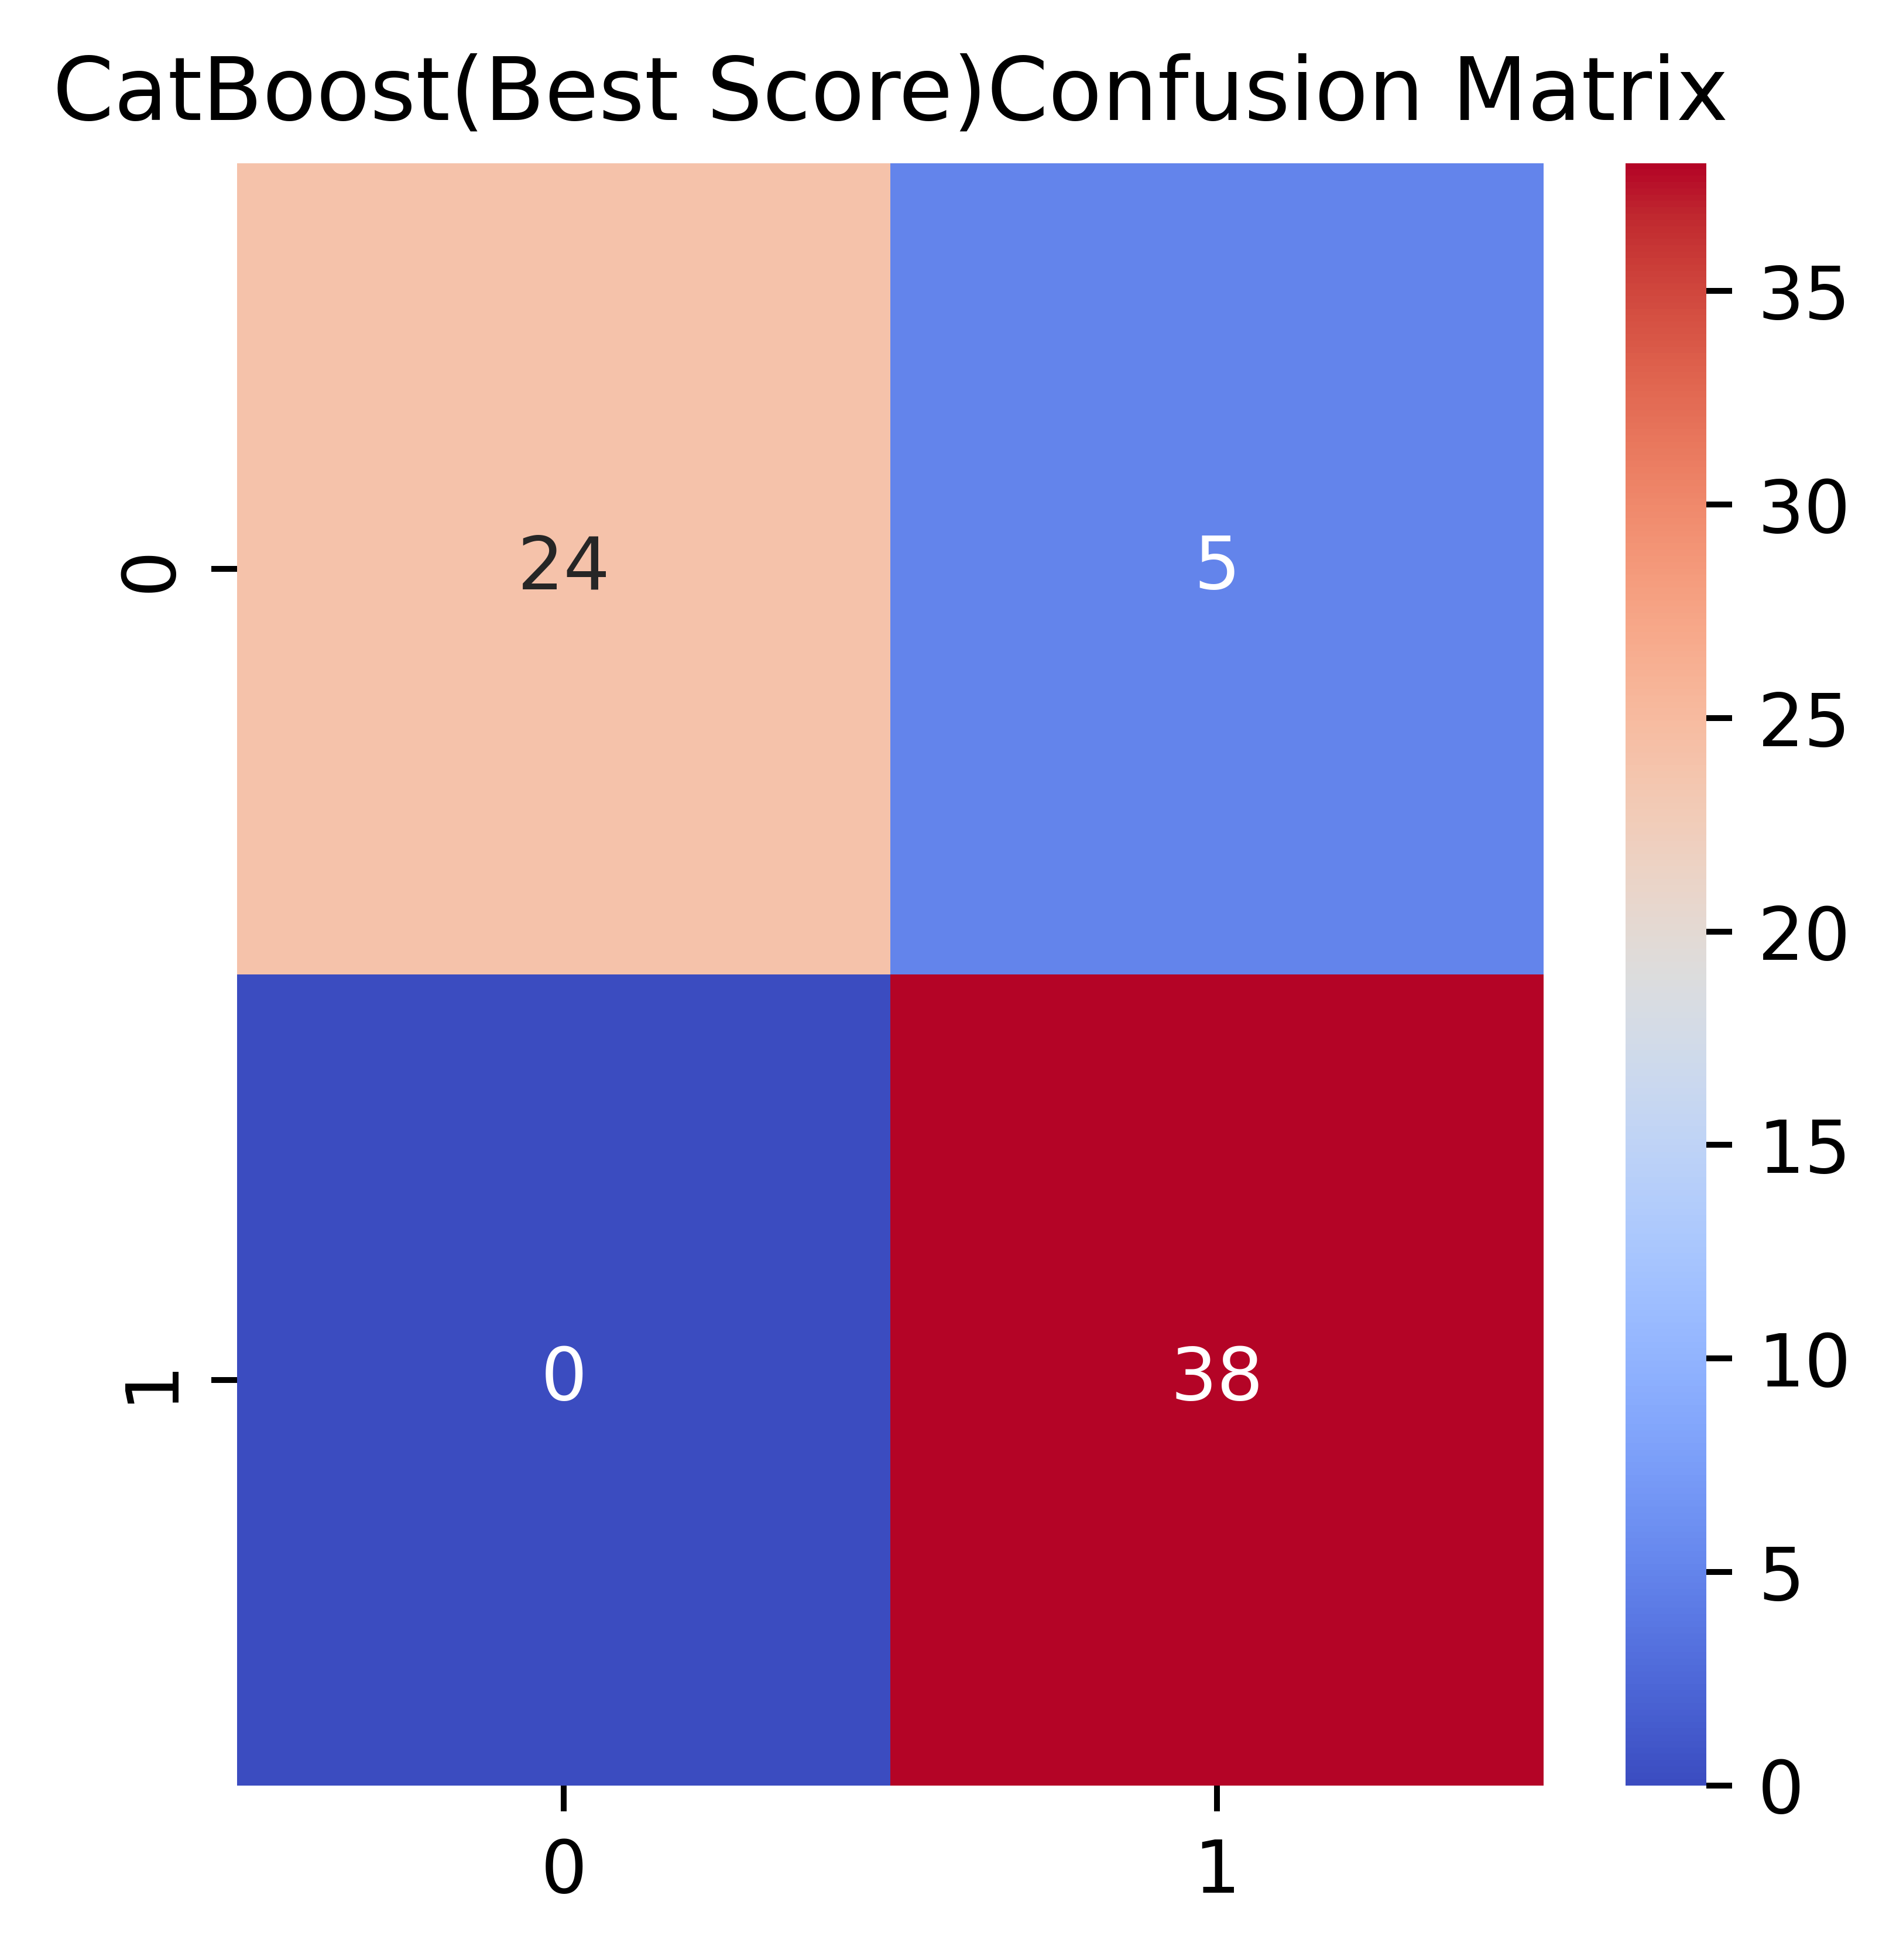

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix, classification_report)

# 初始化 CatBoostClassifier
model = CatBoostClassifier(loss_function='Logloss', logging_level='Verbose', iterations=100)

# 定义超参数网格
param_grid = {
    'depth': [4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.5],
    'iterations': [50, 100, 200]
}

# 使用 GridSearchCV 进行超参数搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)

# 使用最佳参数训练 CatBoost 模型
best_model = grid_search.best_estimator_

# 进行5折交叉验证
cross_val_results = cross_validate(best_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# 输出交叉验证结果
print("交叉验证训练集得分:", cross_val_results['train_score'])
print("交叉验证验证集得分:", cross_val_results['test_score'])

# 使用最佳模型进行预测
Cat_y_pred = best_model.predict(X_test)  # 预测结果
Cat_y_prob = best_model.predict_proba(X_test)[:, 1]  # 预测概率

# 计算混淆矩阵
cm_Catgs = confusion_matrix(y_test, Cat_y_pred)
Cat_acc = best_model.score(X_test, y_test) * 100
cm_dot_four = confusion_matrix(Cat_y_prob >= 0.51, Cat_y_pred)
plt.figure(figsize=(4, 4), dpi=900)#设置图片大小，像素
print('CatBoost混淆矩阵:\n', cm_dot_four)
plt.title("CatBoost(Best Score)Confusion Matrix")
sns.heatmap(cm_dot_four, annot=True, cmap="coolwarm", fmt="d", cbar="TRUE")

In [9]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = Cat_y_prob
y_true = y_test

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.789
Bootstrap #1 ROC area: 0.883
Bootstrap #2 ROC area: 0.818
Bootstrap #3 ROC area: 0.733
Bootstrap #4 ROC area: 0.850
Bootstrap #5 ROC area: 0.841
Bootstrap #6 ROC area: 0.714
Bootstrap #7 ROC area: 0.733
Bootstrap #8 ROC area: 0.734
Bootstrap #9 ROC area: 0.836
Bootstrap #10 ROC area: 0.769
Bootstrap #11 ROC area: 0.783
Bootstrap #12 ROC area: 0.831
Bootstrap #13 ROC area: 0.874
Bootstrap #14 ROC area: 0.772
Bootstrap #15 ROC area: 0.776
Bootstrap #16 ROC area: 0.815
Bootstrap #17 ROC area: 0.711
Bootstrap #18 ROC area: 0.736
Bootstrap #19 ROC area: 0.805
Bootstrap #20 ROC area: 0.788
Bootstrap #21 ROC area: 0.793
Bootstrap #22 ROC area: 0.791
Bootstrap #23 ROC area: 0.810
Bootstrap #24 ROC area: 0.918
Bootstrap #25 ROC area: 0.815
Bootstrap #26 ROC area: 0.857
Bootstrap #27 ROC area: 0.871
Bootstrap #28 ROC area: 0.801
Bootstrap #29 ROC area: 0.795
Bootstrap #30 ROC area: 0.723
Bootstrap #31 ROC area: 0.866
Bootstrap #32 ROC area: 0.858
Bootstrap #33 ROC area: 

Bootstrap #405 ROC area: 0.752
Bootstrap #406 ROC area: 0.806
Bootstrap #407 ROC area: 0.870
Bootstrap #408 ROC area: 0.761
Bootstrap #409 ROC area: 0.815
Bootstrap #410 ROC area: 0.709
Bootstrap #411 ROC area: 0.754
Bootstrap #412 ROC area: 0.786
Bootstrap #413 ROC area: 0.773
Bootstrap #414 ROC area: 0.817
Bootstrap #415 ROC area: 0.694
Bootstrap #416 ROC area: 0.751
Bootstrap #417 ROC area: 0.804
Bootstrap #418 ROC area: 0.795
Bootstrap #419 ROC area: 0.820
Bootstrap #420 ROC area: 0.776
Bootstrap #421 ROC area: 0.799
Bootstrap #422 ROC area: 0.897
Bootstrap #423 ROC area: 0.717
Bootstrap #424 ROC area: 0.775
Bootstrap #425 ROC area: 0.777
Bootstrap #426 ROC area: 0.841
Bootstrap #427 ROC area: 0.815
Bootstrap #428 ROC area: 0.822
Bootstrap #429 ROC area: 0.805
Bootstrap #430 ROC area: 0.677
Bootstrap #431 ROC area: 0.753
Bootstrap #432 ROC area: 0.750
Bootstrap #433 ROC area: 0.712
Bootstrap #434 ROC area: 0.821
Bootstrap #435 ROC area: 0.775
Bootstrap #436 ROC area: 0.826
Bootstra

Bootstrap #787 ROC area: 0.798
Bootstrap #788 ROC area: 0.712
Bootstrap #789 ROC area: 0.866
Bootstrap #790 ROC area: 0.711
Bootstrap #791 ROC area: 0.742
Bootstrap #792 ROC area: 0.859
Bootstrap #793 ROC area: 0.840
Bootstrap #794 ROC area: 0.776
Bootstrap #795 ROC area: 0.870
Bootstrap #796 ROC area: 0.724
Bootstrap #797 ROC area: 0.796
Bootstrap #798 ROC area: 0.805
Bootstrap #799 ROC area: 0.837
Bootstrap #800 ROC area: 0.852
Bootstrap #801 ROC area: 0.766
Bootstrap #802 ROC area: 0.760
Bootstrap #803 ROC area: 0.773
Bootstrap #804 ROC area: 0.754
Bootstrap #805 ROC area: 0.694
Bootstrap #806 ROC area: 0.763
Bootstrap #807 ROC area: 0.783
Bootstrap #808 ROC area: 0.706
Bootstrap #809 ROC area: 0.788
Bootstrap #810 ROC area: 0.791
Bootstrap #811 ROC area: 0.810
Bootstrap #812 ROC area: 0.644
Bootstrap #813 ROC area: 0.809
Bootstrap #814 ROC area: 0.751
Bootstrap #815 ROC area: 0.790
Bootstrap #816 ROC area: 0.722
Bootstrap #817 ROC area: 0.747
Bootstrap #818 ROC area: 0.752
Bootstra

In [10]:
#计算AUC95% CI
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("AUC 95%CI:[{:0.3f}-{:0.3}]".format(
    confidence_lower, confidence_upper))

AUC 95%CI:[0.691-0.874]


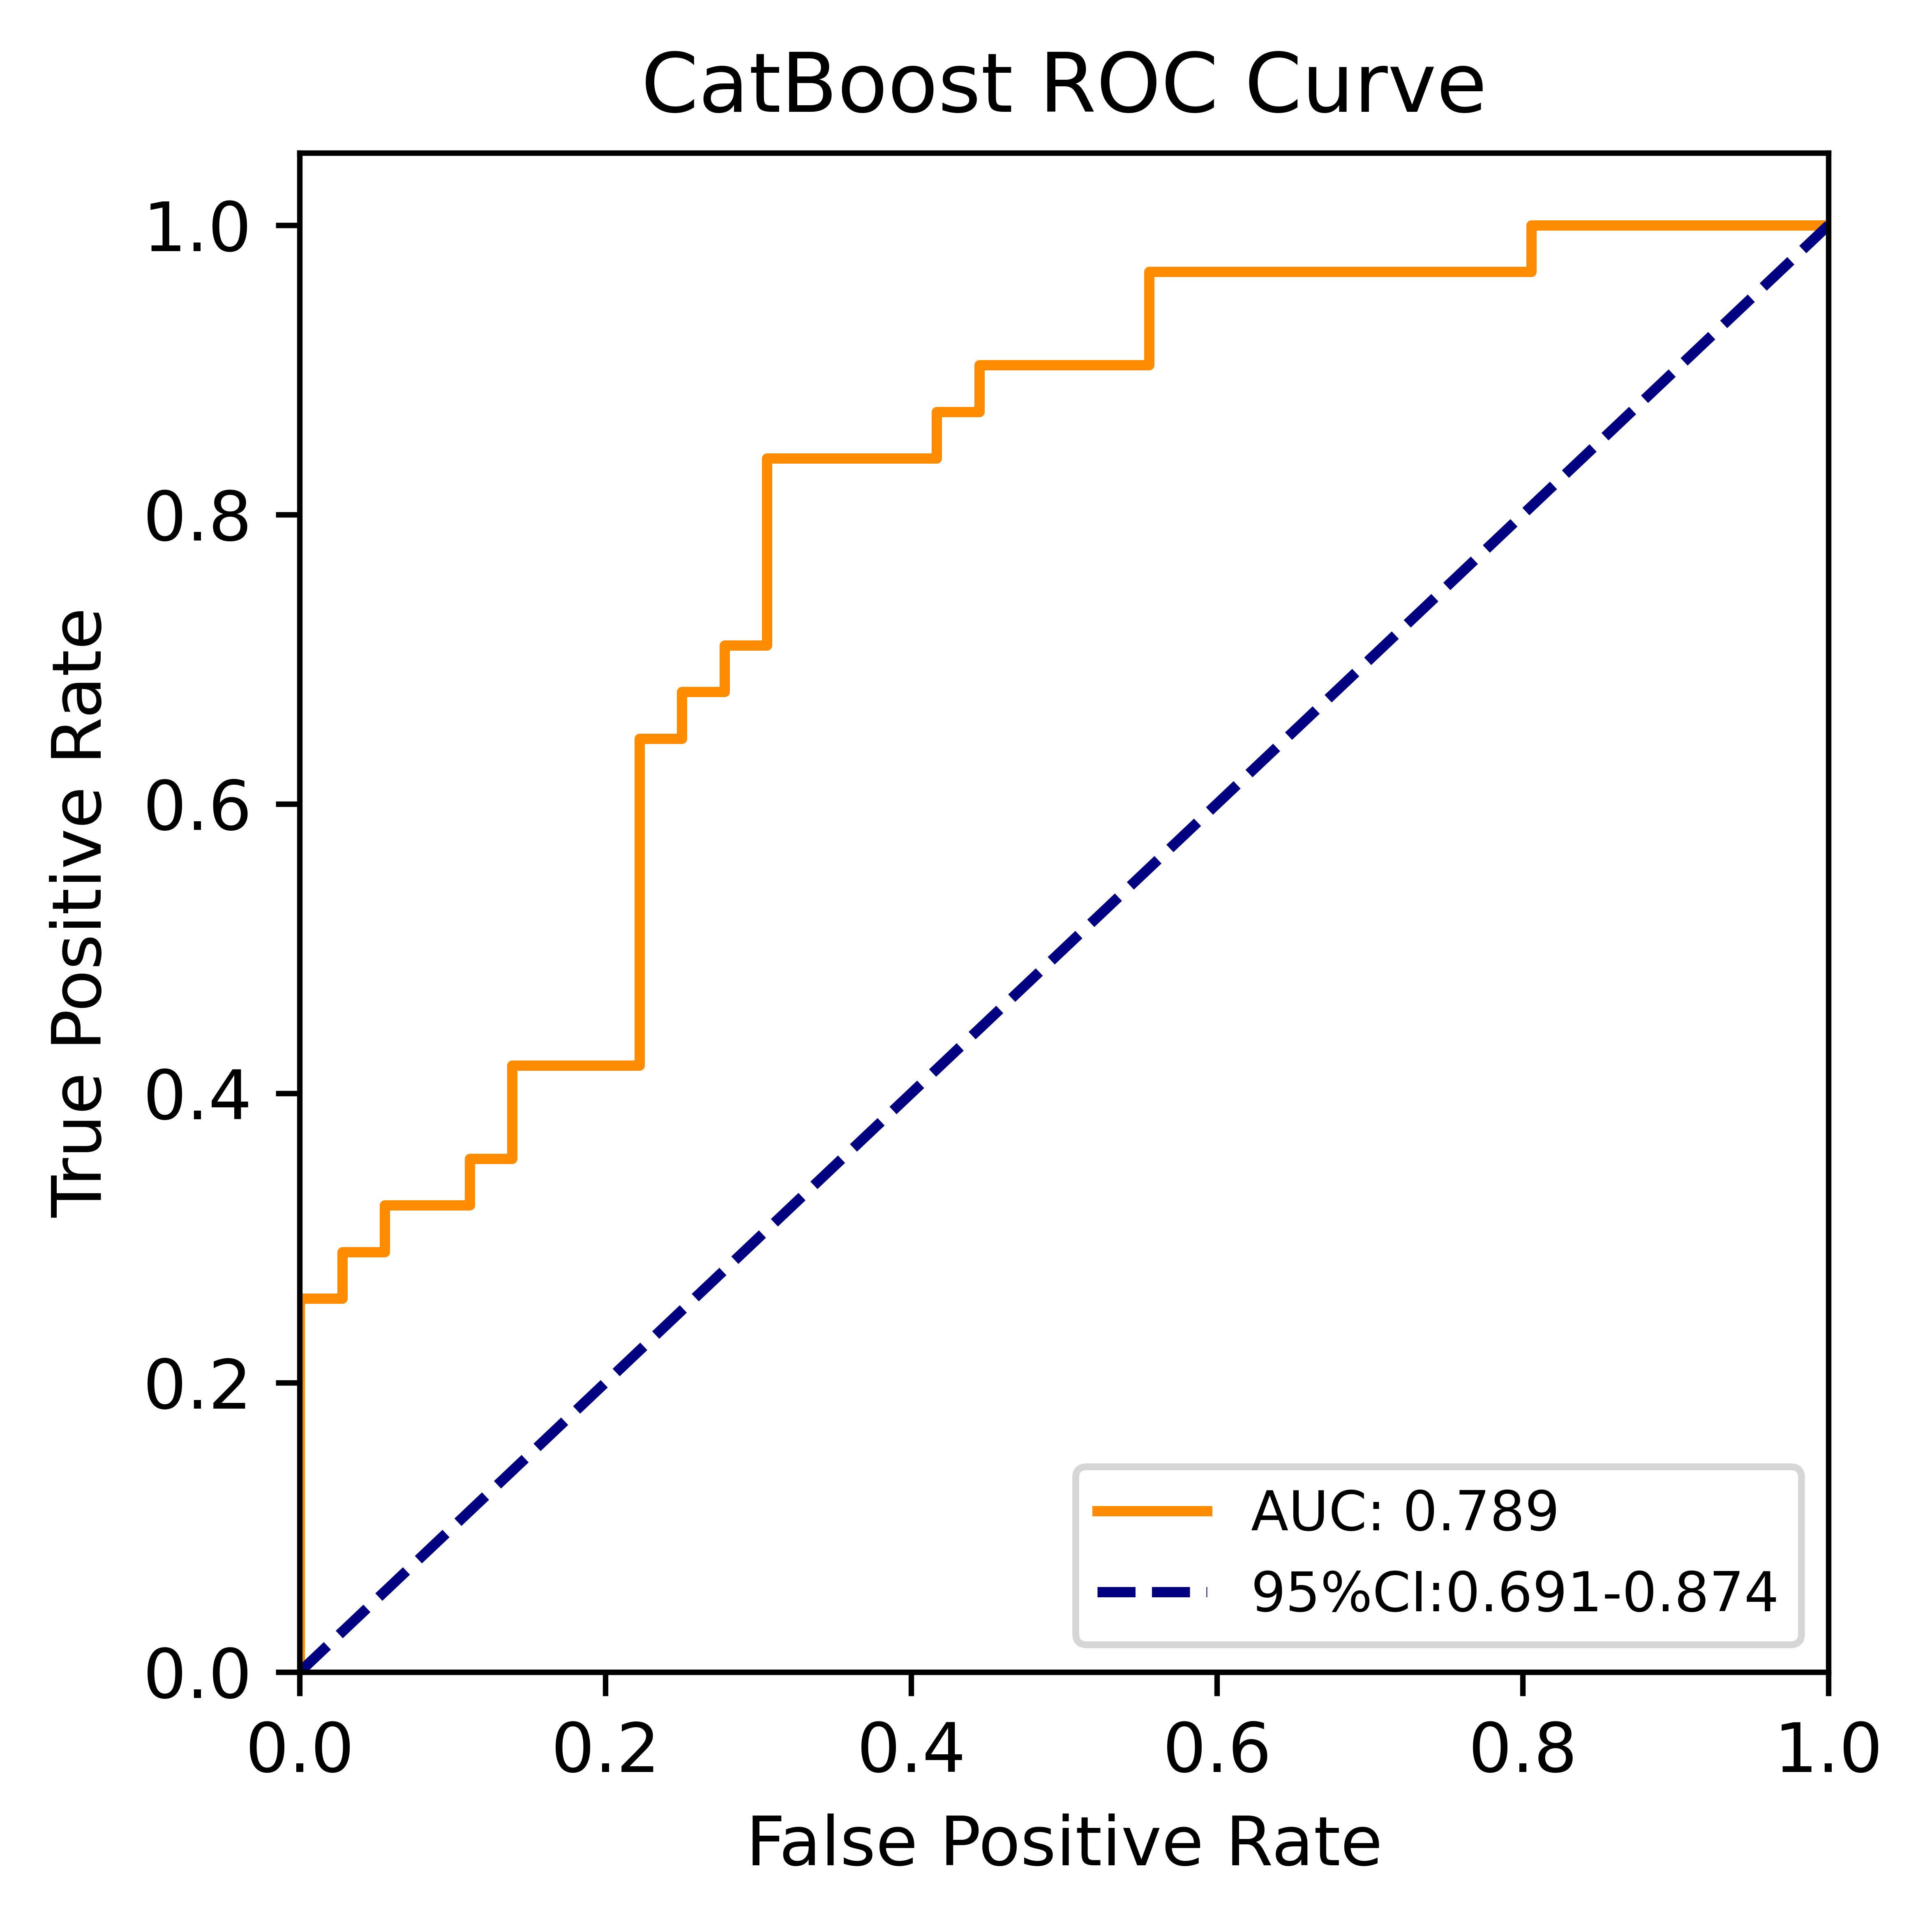

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test,Cat_y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(fpr, tpr, color='darkorange', lw=1.5)
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(['AUC: %0.3f' % roc_auc, "95%CI:{:0.3f}-{:0.3}".format(
    confidence_lower, confidence_upper)],loc="lower right", prop={'size': 8},markerfirst=True)
plt.show()
 

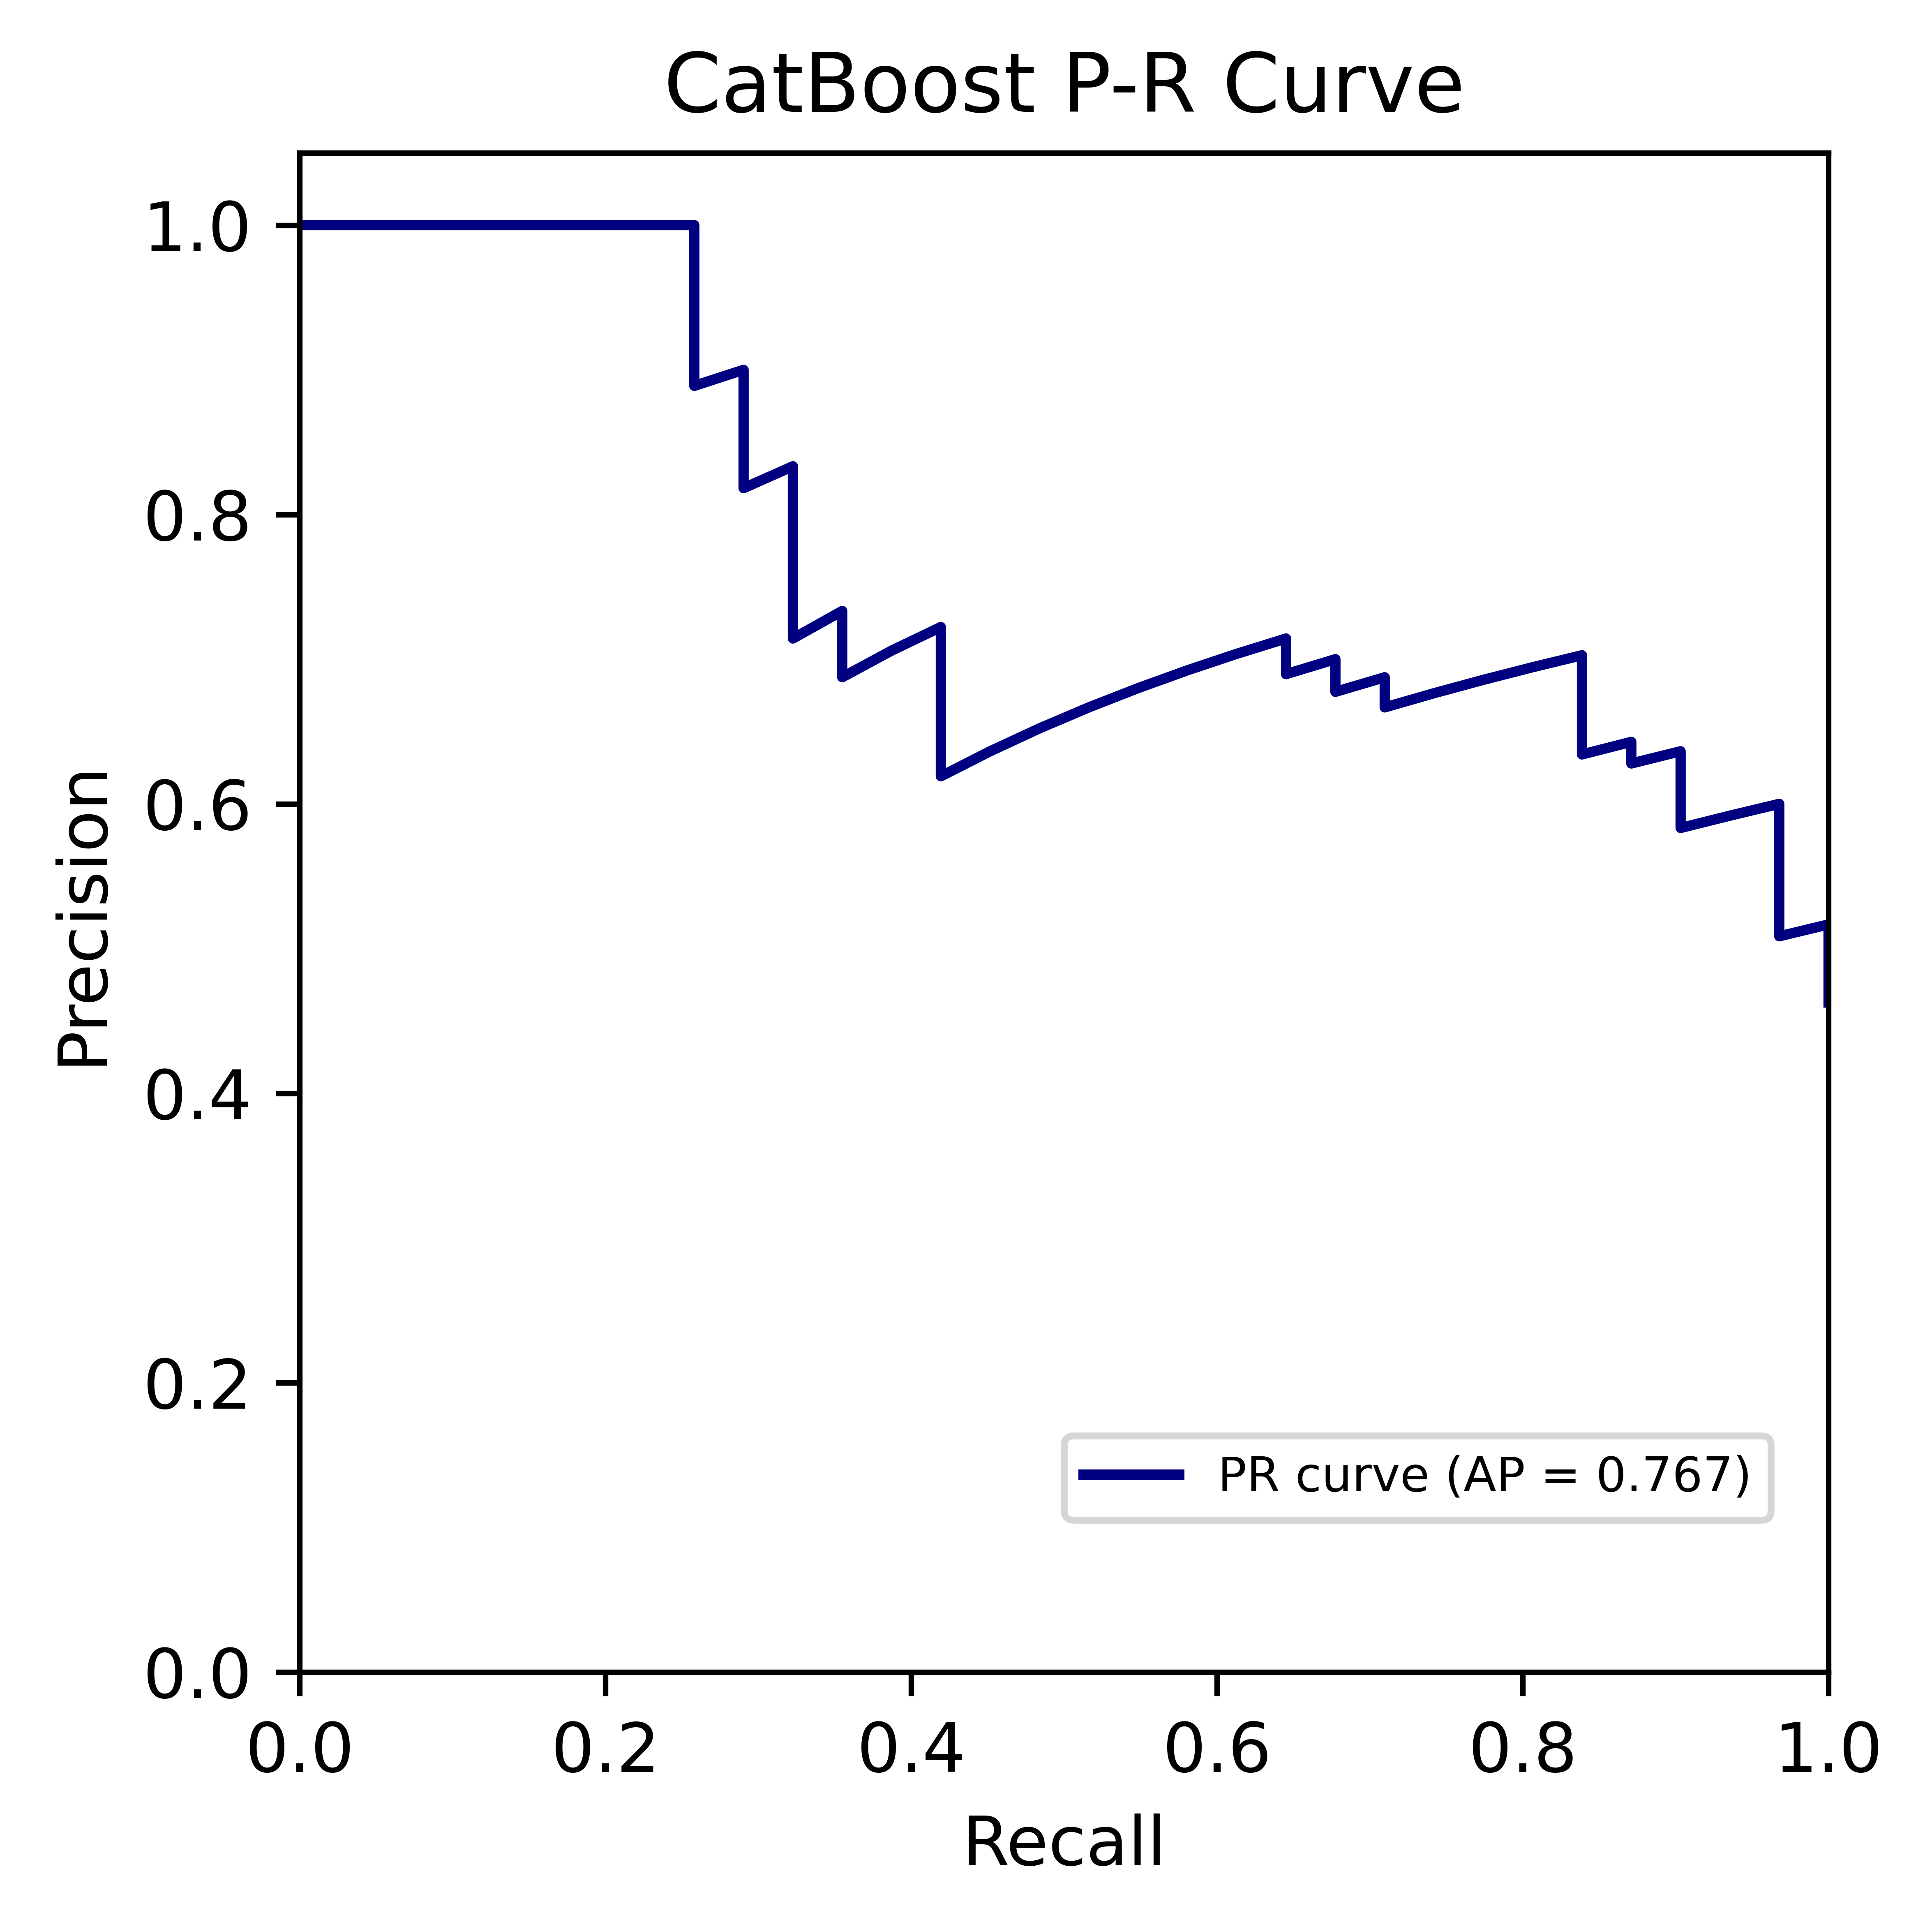

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_true为样本实际的类别1为正例0为反例，y_scores为阈值

precision, recall, thresholds = precision_recall_curve(y_test,Cat_y_prob)
AP = average_precision_score(y_test,Cat_y_prob, average='macro', pos_label=1, sample_weight=None)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(recall, precision, lw=1.5, color='navy', label='PR curve (AP = %0.3f)' % AP)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('CatBoost P-R Curve')
plt.legend(loc=(0.5,0.1), prop={'size': 7})#标签左下角坐标，字体7号
plt.show()

#### 计算AP值，PR曲线下面积，PR曲线下面的面积越大，模型的性能越好
from sklearn.metrics import precision_recall_curve, average_precision_score
AP = average_precision_score(y_test,Cat_y_prob, average='macro', pos_label=1, sample_weight=None)
print('AP:', AP)

In [14]:
##brier评分
from sklearn.metrics import brier_score_loss
print('Brier评分:', brier_score_loss(y_test,Cat_y_prob))

Brier评分: 0.2279780965916095


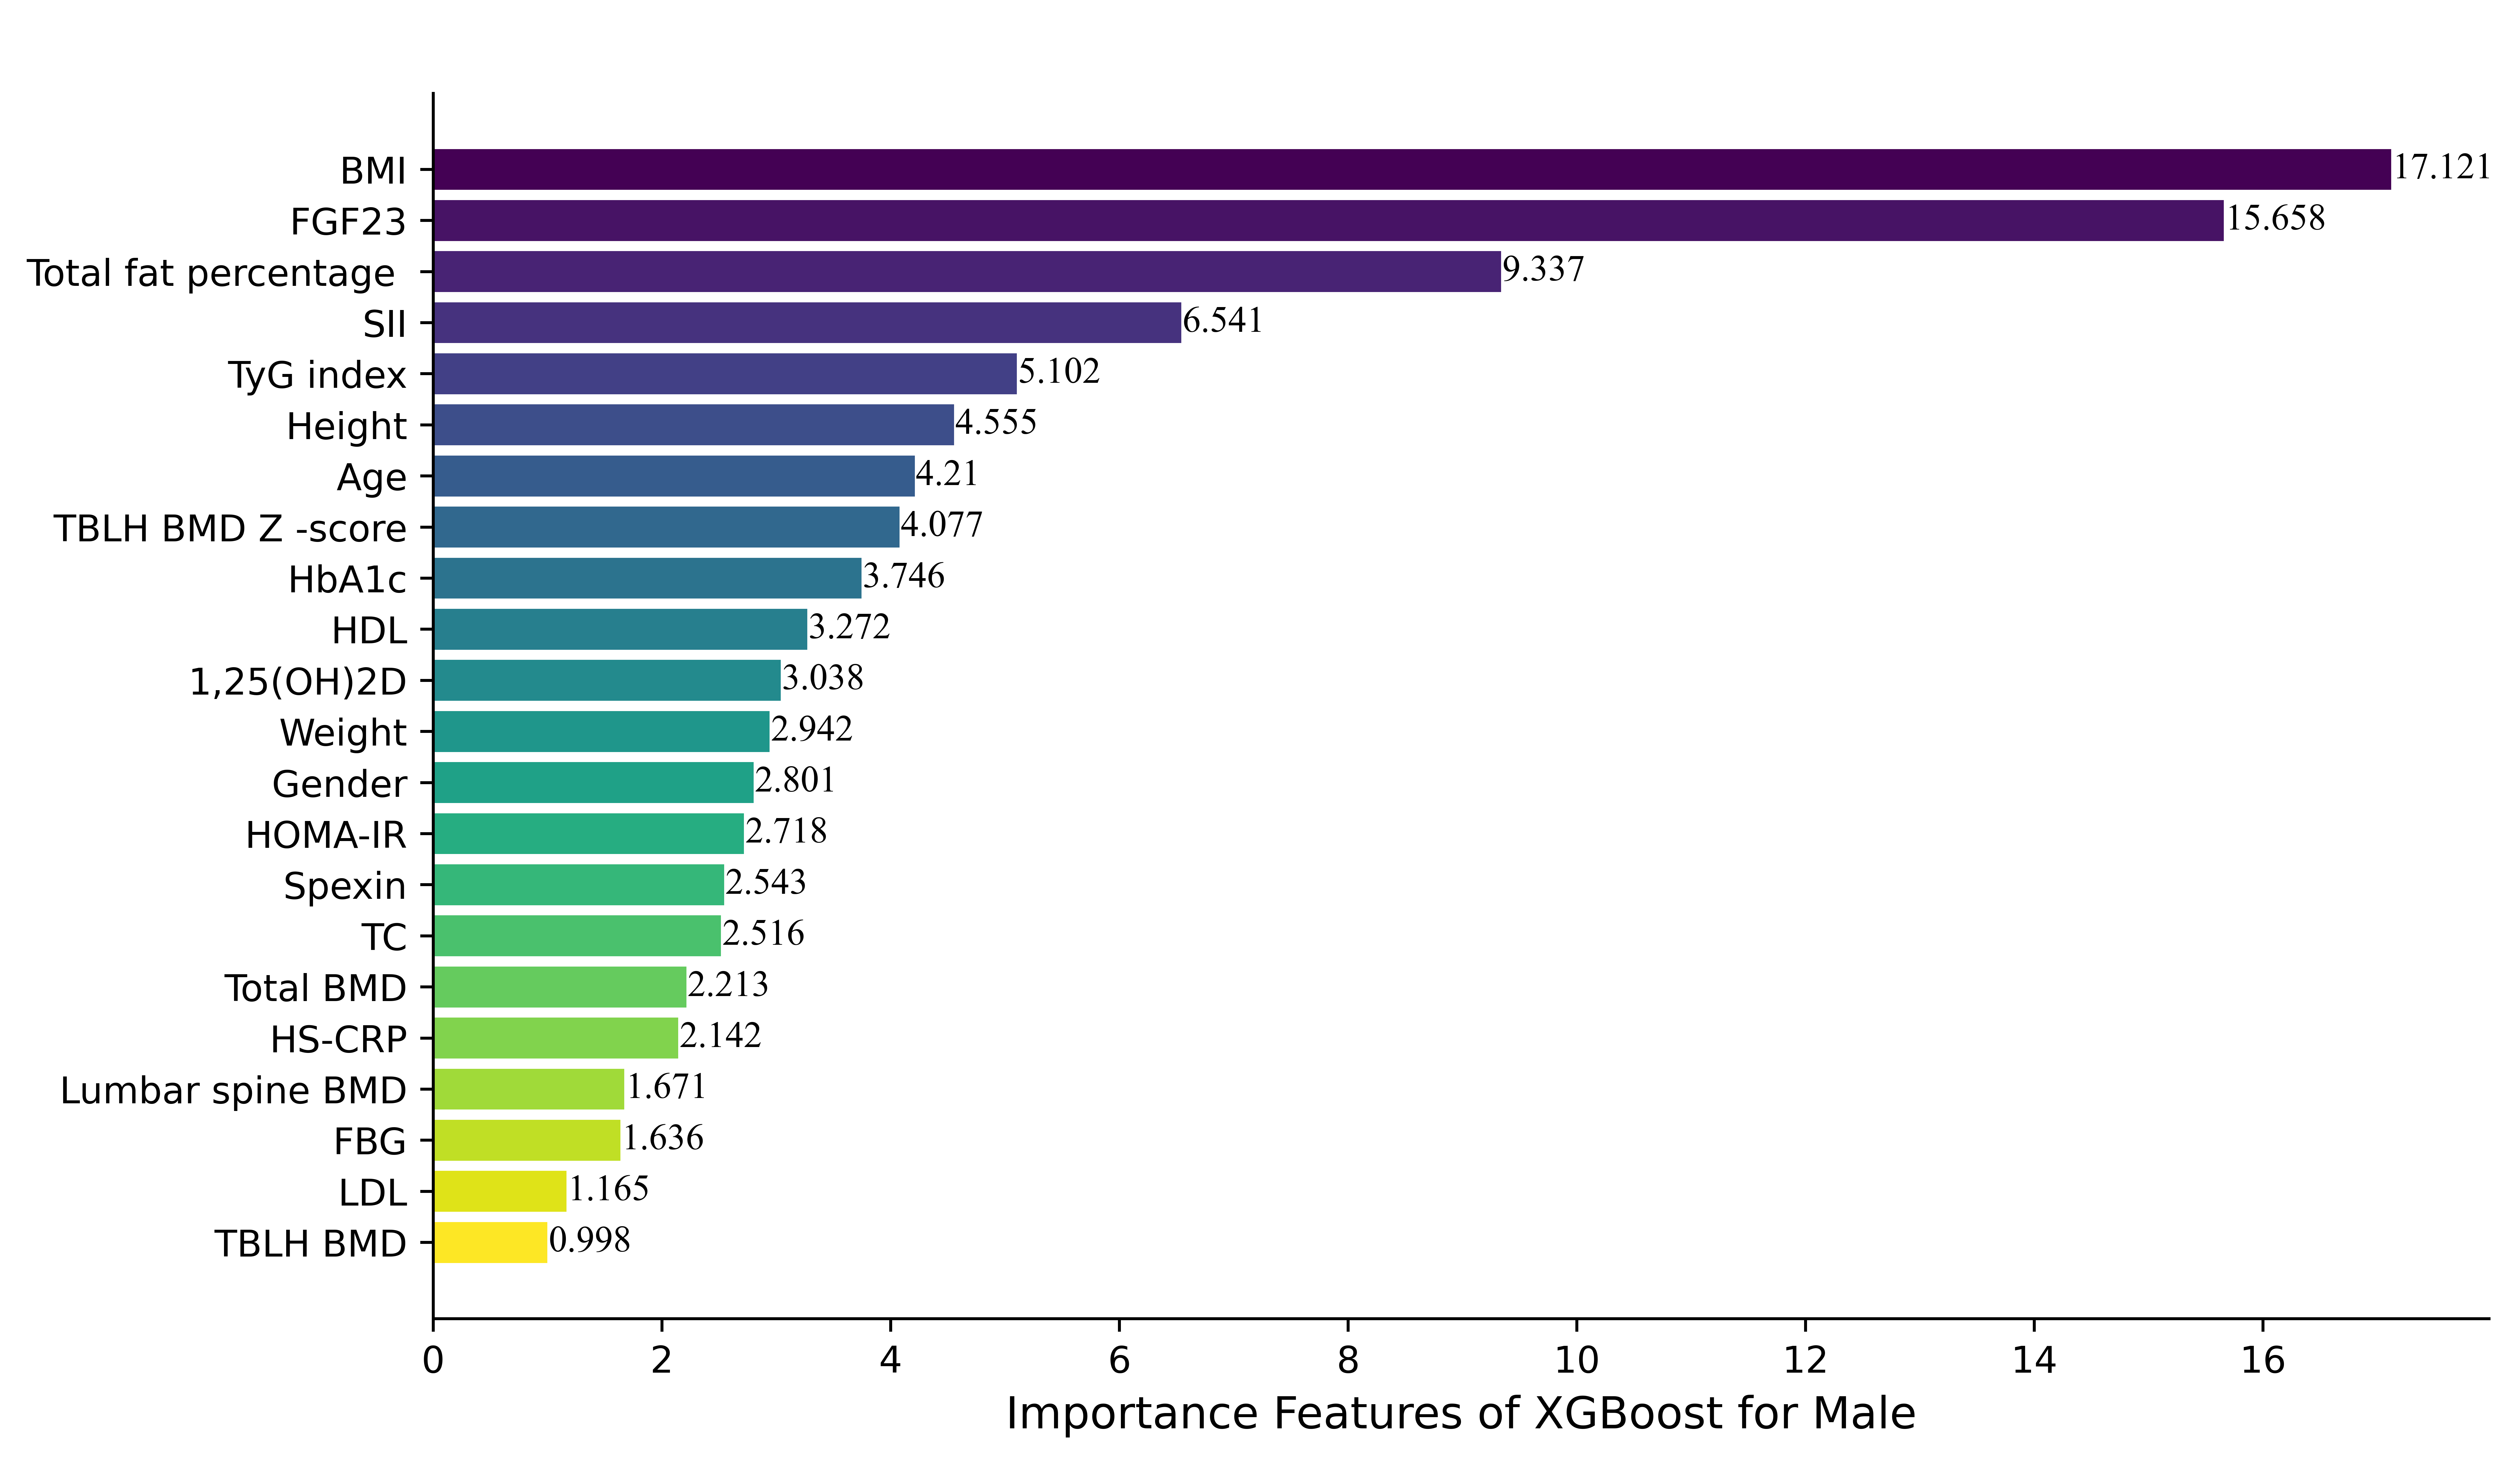

In [15]:
feature_importances = best_model.feature_importances_
# 创建特征名列表
feature_names = list(X.columns)
# 创建一个DataFrame，包含特征名和其重要性得分
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
# 对特征重要性得分进行排序
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
 
# 颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))
 
# 可视化特征重要性
fig, ax = plt.subplots(figsize=(10, 6), dpi=900)
ax.barh(feature_importances_df['feature'], feature_importances_df['importance'], color=colors)
ax.invert_yaxis()  # 翻转y轴，使得最大的特征在最上面
ax.set_xlabel('Importance Features of XGBoost for Male', fontsize=12)  # 图形的x标签
ax.set_title(' ',fontsize=16)
for i, v in enumerate(feature_importances_df['importance']):
    ax.text(v + 0.01, i, str(round(v, 3)), va='center', fontname='Times New Roman', fontsize=10)
 
# # 设置图形样式
# plt.style.use('default')
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框
# ax.spines['left'].set_linewidth(0.5)#左边框粗细
# ax.spines['bottom'].set_linewidth(0.5)#下边框粗细
# ax.tick_params(width=0.5)
# ax.set_facecolor('white')#背景色为白色
# ax.grid(False)#关闭内部网格线

In [16]:
import shap
explainer = shap.KernelExplainer(best_model.predict,X_train)

Using 265 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [17]:
shap_values = explainer.shap_values(X_test,nsamples=200)

  0%|          | 0/67 [00:00<?, ?it/s]

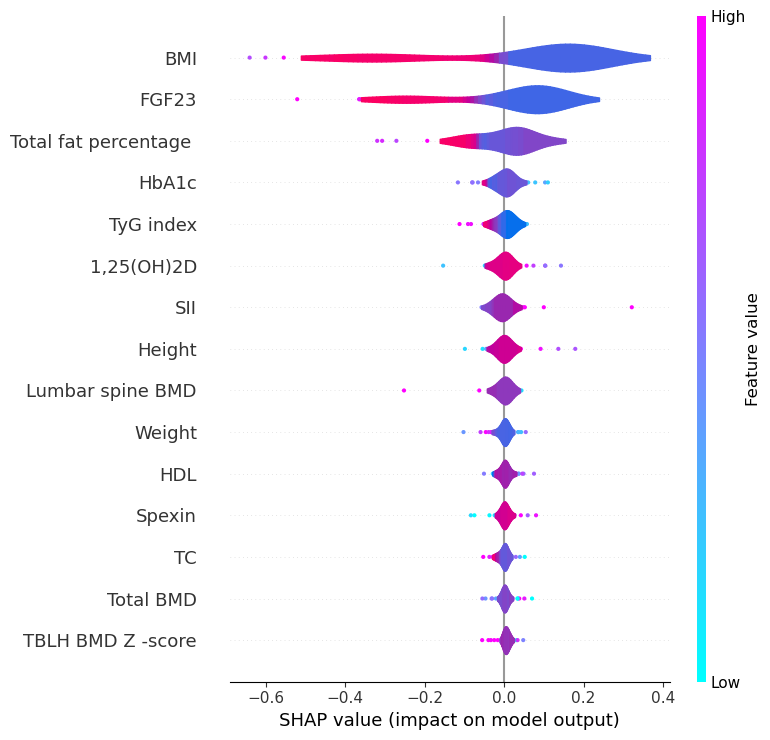

In [18]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values,X_test,feature_names,plot_type='violin',cmap='cool' , max_display=15,show=False)
plt.savefig('./1.png', bbox_inches='tight', dpi=900)

In [19]:
shap.initjs() 
shap.plots.force(explainer.expected_value, shap_values[:300])

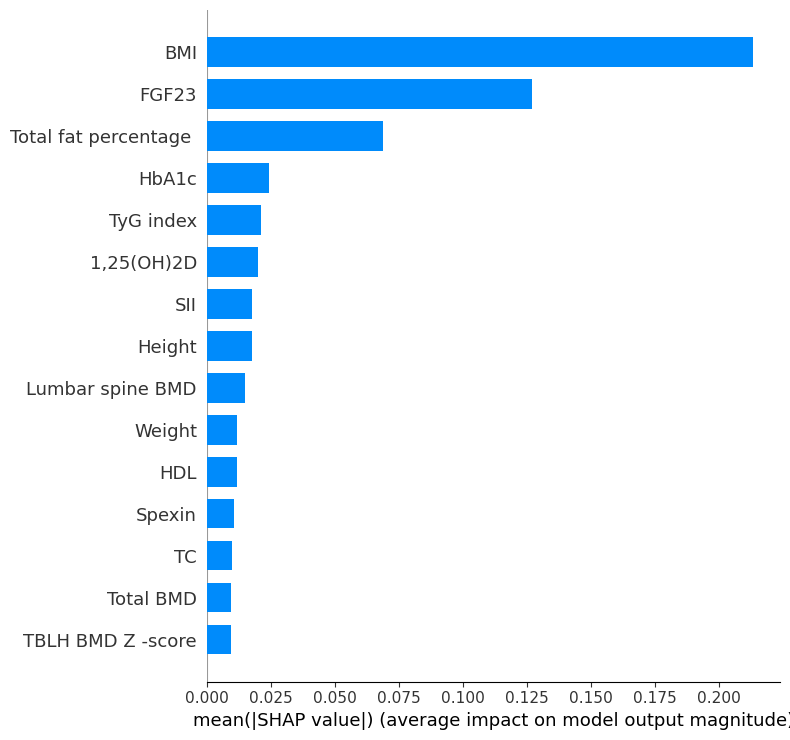

In [20]:
shap.summary_plot(shap_values, X_test,feature_names, plot_type="bar",max_display=15,show=False)
plt.savefig('./2.png', bbox_inches='tight', dpi=900)

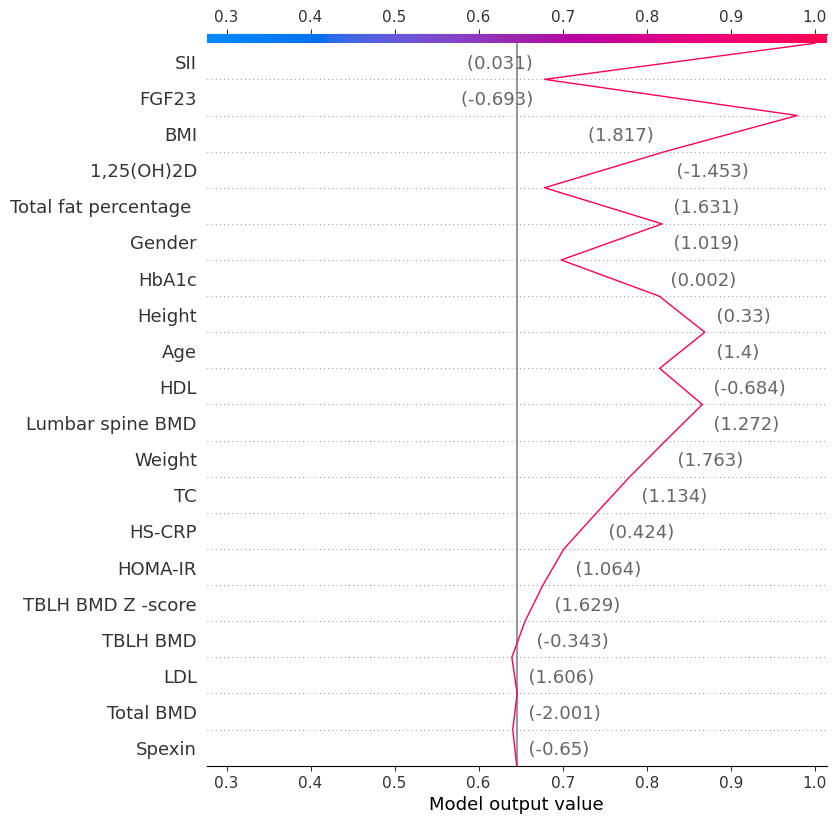

In [21]:
shap.decision_plot(explainer.expected_value, shap_values[2],X_test, feature_names,show=False)
plt.savefig('.3.png', bbox_inches='tight', dpi=900)

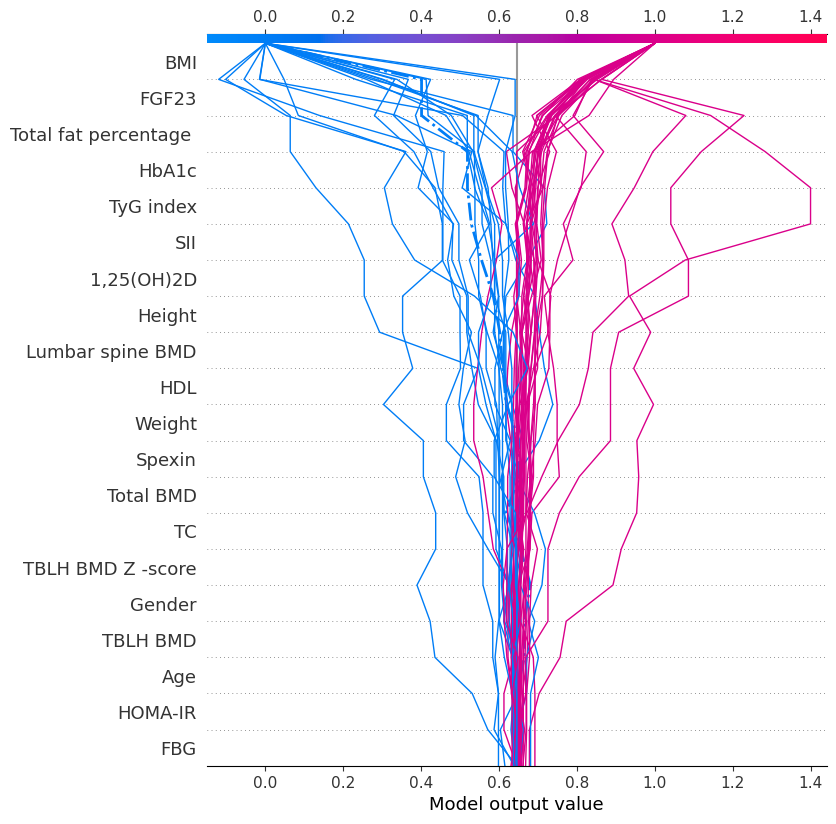

In [22]:
shap.decision_plot(explainer.expected_value, shap_values[:50],X_test, feature_names,highlight=0,show= False)
plt.savefig('./4.png', bbox_inches='tight', dpi=900)

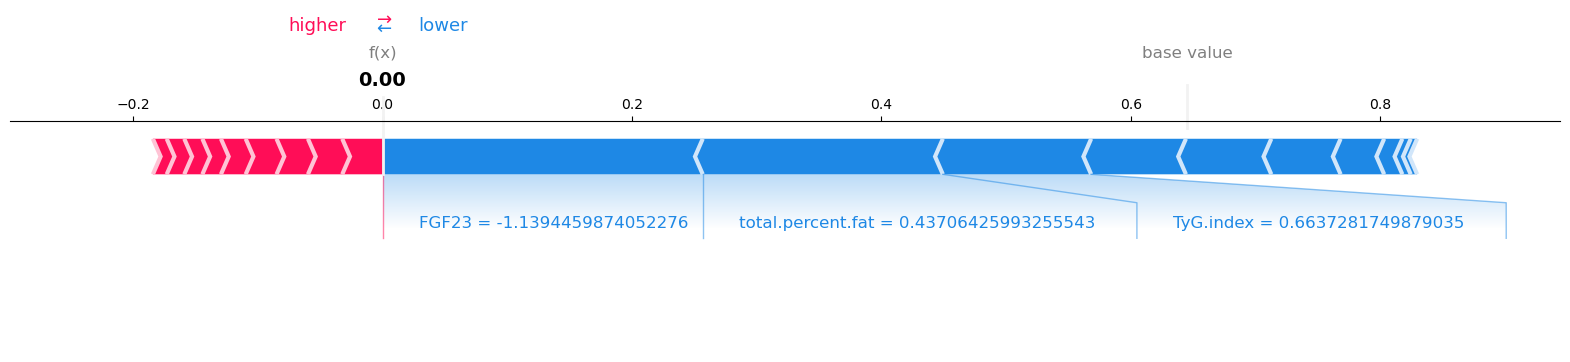

<Figure size 640x480 with 0 Axes>

In [42]:
import shap
import matplotlib.pyplot as plt
shap.initjs()
feature_names = list(X.columns)
shap.force_plot(explainer.expected_value, shap_values[5,:] ,X_test[12,:],feature_names, matplotlib=True)#更改shap_values[13,:]
plt.savefig('./force_plot2.png', bbox_inches='tight', dpi=900)

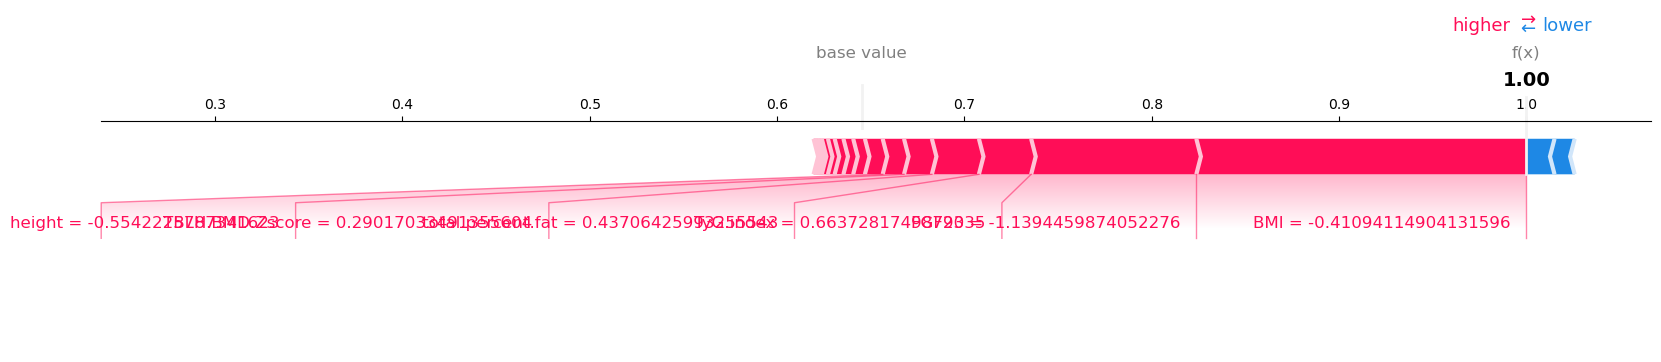

<Figure size 640x480 with 0 Axes>

In [43]:
import shap
import matplotlib.pyplot as plt
shap.initjs()
feature_names = list(X.columns)
shap.force_plot(explainer.expected_value, shap_values[8,:] ,X_test[12,:],feature_names, matplotlib=True)#更改shap_values[13,:]
plt.savefig('./force_plot2.png', bbox_inches='tight', dpi=900)